Now that we solved a PDE where shocks don't show up, let's look at the case when they do.

When the characteristic curves intersect somewhere in the x, y plane, this would result in multiple values of z at the same (x,y) point. That's not possible, so instead, we allow for a shock, or discontinuity.

We will examine shocks in the context of homogeneous quasi-linear and reducible PDEs.

We will stick to our chromatography example, this time with new initial conditions. We are in adsorption mode (initially filled with inert with material being pumped in). The concentration in the feed increases linearly to $\bar{C}$ as time goes up to $\Delta t$, then remains constant.

$$I_1: C = C^0(\xi_1) = 0, x = \xi_1, t=0, 0 \le \xi_1, \le L $$
$$I_2: C = \begin{cases} 
      C^i(\xi_2) = \frac{\bar{C}t}{\Delta t} & x=0, t=\xi_2, 0<\xi_2<\Delta t \\
      C^i(\xi_3) = \bar{C} & x=0, t= \xi_3, \xi_3 > \Delta t
   \end{cases} $$

We will introduce the following dimensionless quantities:

$$z = \frac{x}{L}, \tau = \frac{t}{\Delta t}, u = \frac{C}{\bar{C}}, \alpha = \frac{L \epsilon}{v \Delta t}, \beta = \frac{(1 - \epsilon)\Gamma^{\infty}K}{\epsilon}, \sigma = K \bar{C} $$

This reduces the chromatography equation to:

$$\frac{\partial u}{\partial z} + \Psi(u)\frac{\partial u}{\partial \tau} = 0, 0<z<1, \tau>0 $$

where

$$\Psi(u) = \frac{d \tau}{d z} = \frac{L}{\Delta t V(C)} = \alpha \bigg[ 1+ \frac{\beta}{(1+\sigma u)^2} \bigg] $$

with the ICs

$$I_1: u=0, z=\xi_1, \tau=0, 0 \le \xi_1, \le 1 $$
$$I_2: u = \begin{cases} 
      \xi_2 & z=0, \tau=\xi_2, 0<\xi_2<1 \\
      1 & z=0, \tau= \xi_3, \xi_3 > 1
   \end{cases} $$

The characteristic straight lines are defined by the slope:

$$\frac{d \tau}{d z} = \Psi(u) $$

Integrating with the first IC gives:

$$\tau = \Psi(0)(z - \xi_1), 0 \le \xi_1 \le 1 $$

Two different expressions are obtained when integrating with the second condition:

$$\tau = \xi_2 + \Psi(\xi_2)z, 0 < \xi_2 < 1 $$

and 

$$\tau = \xi_3 + \Psi(1)z, \xi_3 > 1 $$

Let's eliminate $\xi_1$ and $\xi_3$ from the outermost equations. We get:

$$u = 0, 0 < \tau < \Psi(0)z $$
$$u = 1, \tau > 1 + \Psi(1)z $$

In the intermediate region, the solution follows the middle curve (the one with $\xi_2$). This can be expressed:

$$\tau = u + \Psi(u)z, 0 < u < 1 $$

We can make this explicit with our expression for $\Psi$:

$$z = \frac{(\tau - u)(1 + \sigma u)^2}{\alpha [\beta + (1 + \sigma u)^2]}, 0 < u < 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
x = np.linspace(0, 1, 300)
t = np.linspace(0, 1, 600)

G = 0.5
K = 2
v = 2
Cbar = 1
eps = 0.5

dt = 0.25
L = 1
z = x/L

tau = t/dt
alpha = L*eps/(v*dt)
beta = (1 - eps)*G*K/eps
sig = K*Cbar

In [3]:
beta

1.0

In [4]:
def psi(u):
    V = alpha*(1+(beta/((1+sig*u)**2)))
    
    return V

Text(0, 0.5, '$\\Psi$')

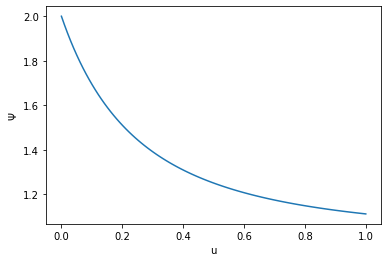

In [5]:
fig, ax = plt.subplots()

utest = np.linspace(0, 1, 100)
psitest = psi(utest)

ax.plot(utest, psitest)
ax.set_xlabel('u')
ax.set_ylabel(r'$\Psi$')

In [6]:
zv, tauv = np.meshgrid(z, tau)
u = 0*zv

u[tauv > 1 + psi(1)*zv] = 1

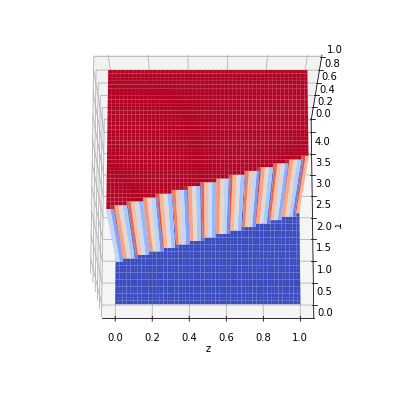

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.view_init(elev=75, azim=-90)

In [8]:
ttest = tauv[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv)]
ztest = zv[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv)]
Cinit = ztest*0 + 0.5

In [9]:
Cinit.shape

(24884,)

In [10]:
import scipy.optimize
def psolver(u):
    return psi(u)*ztest + u - ttest

In [11]:
umiddle = scipy.optimize.newton_krylov(psolver, Cinit, f_tol=1e-14, maxiter=1000, verbose=True)
u[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv)] = umiddle

0:  |F(x)| = 0.191427; step 1
1:  |F(x)| = 0.00949265; step 1
2:  |F(x)| = 0.00127332; step 1
3:  |F(x)| = 5.02797e-05; step 1
4:  |F(x)| = 9.47892e-08; step 1
5:  |F(x)| = 3.43059e-13; step 1
6:  |F(x)| = 4.44089e-16; step 1


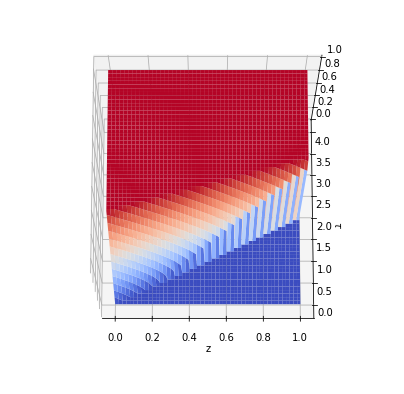

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.view_init(elev=75, azim=-90)

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

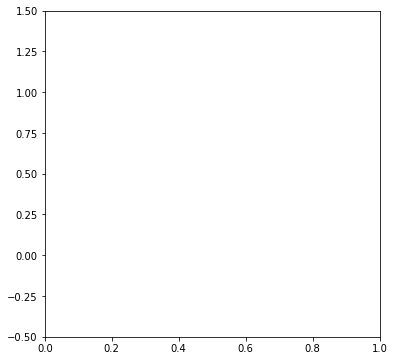

In [14]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim((0, 1))
ax.set_ylim((-0.5, 1.5))


line, = ax.plot([], [], lw=2)



def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    ui = u[:, 10*i]
    line.set_data(t, ui)
    
    return (line,)

In [75]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=15, blit=True)

In [39]:
HTML(anim.to_html5_video())

This solution looks nice, but it is wrong. Why?

**Hint**: look at the functional form of z(u).

The profiles become steeper while moving along the column.

Looking at the function for the wave velocity:

$$c = \frac{1}{\Psi(u)} = \frac{(1 + \sigma u)^2}{\alpha[1 + (1 + \sigma u)^2]} $$

which is a monotonically increasing function with respect with u. This means that larger concentrations move faster (have higher wave velocities) through the column than smaller values. 

In [208]:
uexp = np.linspace(0, 1, 1000)

tauexp, uexp = np.meshgrid(tau, uexp)
#zexp = 0*zv

zexp = (tauexp - uexp)*(1 + sig*uexp)**2/(alpha*(beta + (1 + sig*uexp)**2))
uexp[zexp < 0] = 0
uexp[zexp > 1] = 1

tauexp[zexp < 0] = 0
tauexp[zexp > 1] = 3

zexp[zexp < 0] = 0
zexp[zexp > 1] = 1

(-1, 3)

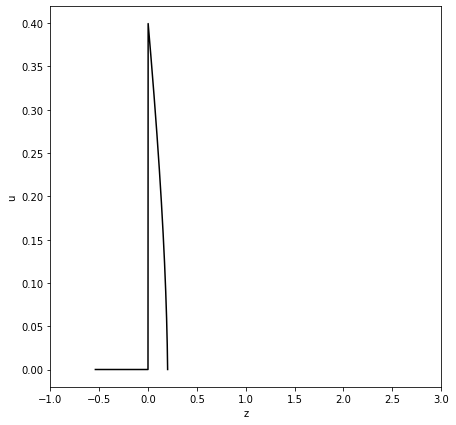

In [113]:
uexp = np.linspace(0, 1, 1000)

tauexp = 0.4
fig, ax = plt.subplots(figsize=(7, 7))

zexp = (tauexp - uexp)*(1 + sig*uexp)**2/(alpha*(beta + (1 + sig*uexp)**2))
uexp[zexp < 0] = 0
uexp[zexp > 1] = 1
#zexp[zexp < 0] = 0
ax.plot(zexp, uexp, c='k', label=r'$\tau$ = {}'.format(tauexp))

ax.set_xlabel('z')
ax.set_ylabel('u')
ax.set_xlim([-1,3])

In [125]:
#uexp[(tauexp > 1 + psi(1)*zexp)] = 0
#uexp[(tauexp < psi(0)*zexp)] = 1


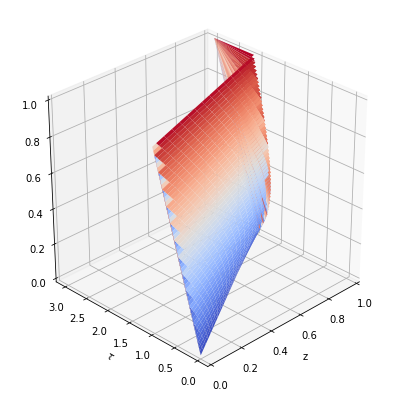

In [209]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)
ax.plot_surface(zexp, tauexp, uexp, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.set_xlim([0,1])
ax.view_init(elev=30, azim=-135)

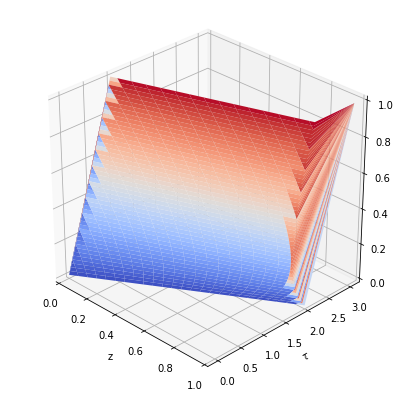

In [210]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)
ax.plot_surface(zexp, tauexp, uexp, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.set_xlim([0,1])
ax.view_init(elev=30, azim=-45)

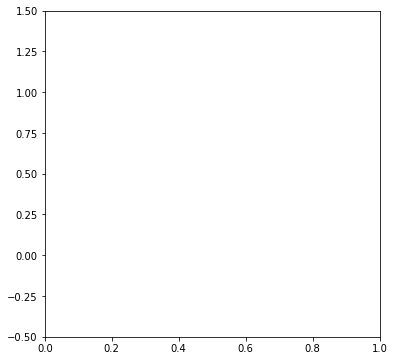

In [203]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim((0, 1))
ax.set_ylim((-0.5, 1.5))


line, = ax.plot([], [], lw=2, c='k')
line2, = ax.plot([], [], lw=2, c='k')
line3, = ax.plot([], [], lw=2, c='k')



def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return (line, line2, line3,)

def animate(i):
    #tauexp1 = tauexp[0, 10*i]
    tauv1 = tauv[10*i, 0]
    ui = uexp[:, 10*i]
    u2 = u[10*i, :]
    zi = zexp[:, 10*i]
    z2 = zv[10*i, :]
    line.set_data(zi[(zi > 0) & (zi < 1)], ui[(zi > 0) & (zi < 1)])
    line2.set_data(z2[tauv1 > 1 + psi(1)*z2], u2[tauv1 > 1 + psi(1)*z2])
    line3.set_data(z2[tauv1 < psi(0)*z2], u2[tauv1 < psi(0)*z2])
    return (line, line2, line3,)

In [204]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=15, blit=True)

HTML(anim.to_html5_video())

Interesting. While mathematically correct, this solution is physically impossible! How can our concentration take on two values simultaneously at the same point in space? Why?

Our first order model fails and loses reliability in this region. The concentration profiles are steep and exhibit large second order derivatives. Thus, axial dispersion is no longer negligible, and we should revise our model to take this into account. 

Since the model is invalid in this region, we replace it with an alternate one. The larger concentration values are **superimposed** on top of the smaller ones. This creates a discontinuity or shock.

The steady-state mass balance at the shock interface requires that no mass be accumulated: the flow entering and leaving the interface must be identical. Both flows are the sum of two contributions: (1) the convective flow of the mobile phase, whose velocity is $v/\epsilon - V_s$ and (2) the stationary phase releases amounts of the adsorbable component. Thus, we have:

$$\epsilon C_{+} \bigg( \frac{v}{\epsilon} - V_s \bigg) + (1 - \epsilon) \Gamma_{-}V_s = \epsilon C_{-} \bigg( \frac{v}{\epsilon} - V_s \bigg) + (1 - \epsilon) \Gamma_{+}V_s$$

which becomes:

$$\frac{v}{V_s} = \epsilon + (1 - \epsilon)\frac{\Gamma_{+} - \Gamma_{-}}{C_{+} - C_{-}} $$

Substitution gives:

$$\frac{v}{ \epsilon V_s} = 1 + \frac{\beta}{u_{+} - u_{-}} \bigg[ \frac{u_{+}}{1 + \sigma u_{+}} - \frac{u_{-}}{1 + \sigma u_{-}} \bigg] $$

Final solution:

After the shock has been formed:

$$u = 0, \tau < \alpha z - \frac{1}{2 \sigma} + \sqrt{\frac{2 \alpha \beta z}{\sigma}}, z_s < z < \bar{z} $$

$$u = 0, \tau < \bar{\tau} + \alpha \bigg[ 1 + \frac{\beta}{1 + \sigma} \bigg](z - \bar{z}), z > \bar{z} $$

where $z_s$ is where the shock trajectory begins:

$$z_s = \frac{1}{2 \alpha \beta \sigma}, \tau_s = \frac{(1 + \beta)}{2 \beta \sigma} $$

and $\bar{z}$ is where it ends:

$$\bar{z} = \frac{(1 + \sigma)^2}{2 \alpha \beta \sigma}, \bar{\tau} = \frac{(1 + \sigma)^2 + \beta(1 + 2 \sigma)}{2 \beta \sigma} $$

Above the shock trajectory,

$$z = \frac{(\tau - u)(1 + \sigma u)^2}{\alpha [\beta + (1 + \sigma)^2]}, \alpha z - \frac{1}{2 \sigma} + \sqrt{\frac{2 \alpha \beta z}{\sigma}} < \tau < 1 + \Psi(1) z, z_s < z < \bar{z} $$

For large times, it is just 1:

$$u = 1, \tau > 1 + \Psi(1)z, z_s < z < \bar{z} $$

and

$$u = 1, \tau > \bar{\tau} + \alpha \bigg( 1 + \frac{\beta}{1 + \sigma} \bigg) (z - \bar{z}), z > \bar{z} $$

In [67]:
zv, tauv = np.meshgrid(z, tau)
u = 0*zv

zs = 1/(2 * alpha * beta * sig)
taus = (1 + beta)/(2 * beta * sig)
zb = (1 + sig)**2/(2 * alpha * beta * sig)
taub = ((1 + sig)**2 + beta*(1 + 2*sig))/(2*beta*sig)

taulow = alpha*zv - 1/(2*sig) + np.sqrt(2 * alpha * beta * zv/sig)
tauhi = 1 + psi(1)*zv
taularge = taub + alpha*(1 + beta/(1 + sig))*(zv - zb)

In [68]:
u[(tauv > 1 + psi(1)*zv) & (zv > zs) & (zv < zb)] = 1
u[(tauv > taularge) & (zv > zb)] = 1
u[(tauv > 1 + psi(1)*zv) & (zv <= zs)] = 1



In [69]:
ttest = tauv[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv) & (zv < zs)]
ztest = zv[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv) & (zv < zs)]
Cinit = ztest*0 + 0.5

In [70]:
Cinit.shape

(9963,)

In [71]:
import scipy.optimize
def psolver(u):
    return psi(u)*ztest + u - ttest

In [72]:
umiddle = scipy.optimize.newton_krylov(psolver, Cinit, f_tol=1e-14, maxiter=100, verbose=True)
u[(tauv < 1 + psi(1)*zv) & (tauv > psi(0)*zv) & (zv < zs)] = umiddle

0:  |F(x)| = 0.0428478; step 1
1:  |F(x)| = 0.00747974; step 1
2:  |F(x)| = 0.000911429; step 1
3:  |F(x)| = 2.70656e-05; step 1
4:  |F(x)| = 2.74714e-08; step 1
5:  |F(x)| = 2.91989e-14; step 1
6:  |F(x)| = 2.22045e-16; step 1


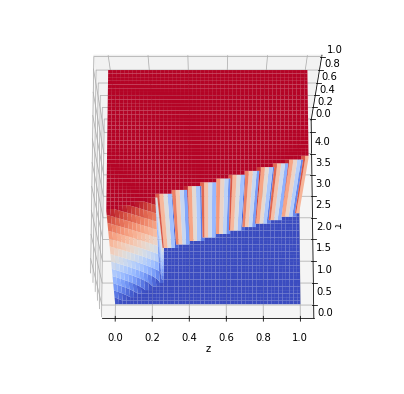

In [73]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.view_init(elev=75, azim=-90)

In [74]:
ttest = tauv[(tauv > taulow) & (tauv < 1 + psi(1)*zv) & (zv > zs) & (zv < zb)]
ztest = zv[(tauv > taulow) & (tauv < 1 + psi(1)*zv) & (zv > zs) & (zv < zb)]
Cinit = ztest*0 + 0.55

In [75]:
Cinit.shape

(18242,)

In [76]:
import scipy.optimize
def psolver(u):
    return psi(u)*ztest + u - ttest

In [77]:
umiddle = scipy.optimize.newton_krylov(psolver, Cinit, f_tol=1e-14, maxiter=100, verbose=True)
u[(tauv > taulow) & (tauv < 1 + psi(1)*zv) & (zv > zs) & (zv < zb)] = umiddle

0:  |F(x)| = 0.11966; step 1
1:  |F(x)| = 0.010519; step 1
2:  |F(x)| = 0.00229815; step 1
3:  |F(x)| = 0.000448212; step 1
4:  |F(x)| = 5.06281e-05; step 1
5:  |F(x)| = 1.10761e-06; step 1
6:  |F(x)| = 5.82145e-10; step 1
7:  |F(x)| = 8.88178e-16; step 1


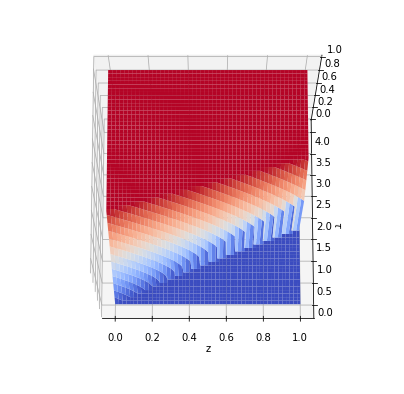

In [91]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(zv, tauv, u, cmap=cm.coolwarm)

ax.set_xlabel('z')
ax.set_ylabel(r'$\tau$')
ax.view_init(elev=75, azim=-90)

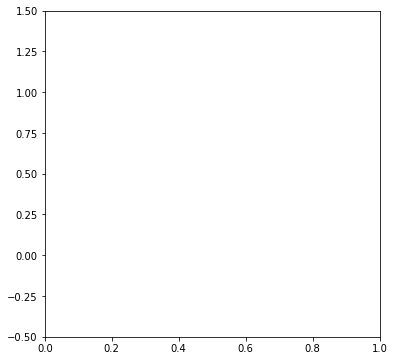

In [87]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim((0, 1))
ax.set_ylim((-0.5, 1.5))


line, = ax.plot([], [], lw=2, c='k')



def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    #tauexp1 = tauexp[0, 10*i]
    tauv1 = tauv[6*i, 0]
    u2 = u[6*i, :]
    z2 = zv[6*i, :]
    line.set_data(z2, u2)
    return (line,)

In [90]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=99, interval=55, blit=True)

HTML(anim.to_html5_video())

Solutions of 1st order PDEs with discontinuities are known as *weak solutions*, meaning they are not continuously differentiable. 

The discontinuity doesn't necessarily originate from the ICs, as demonstrated in the previous example. The general approach to coming up with a solution to such problems is:

1. Determine the location of the shock in the (x,t) plane.
2. Evaluate the propagation of the shock: $\bigg( \frac{dx}{dt} \bigg)_shock = V_s $

Where do shocks occur then? Let's look at the general form:

$$\frac{\partial \gamma}{\partial x} + \Psi(\gamma) \frac{\partial \gamma}{\partial t} = 0 $$

Wen the wave velocity is positive, and we have the IC:

$$\gamma = \gamma^0(\xi),  x = \gamma, t=0, 0<\xi<1 $$

And by definition:

$$\frac{dt}{dx} = \Psi(\gamma) $$

Integrating gives:

$$t = \Psi(\gamma^0(\xi))(x - \xi) $$

The shock occurs at the first intersection of these characteristics.